In [17]:
library('ggplot2')
library('reshape2')

## Simulation results
Analysing the results from simulation comparing the performance of variable selection through Selective Inference with original and modified version of **minMod** variance-covariance matrix approximation.

**Features of the data**
* n = 100, with 25 subjects with 4 observations each.
* p = 100, with varying number of non-zero coefficients, which take values in \{-1,-0.8,0.8,1\}.
* Random intercept, without other random effects.
* SNR $ = 4$.
* $\lambda$ is fixed for both methods, without optimization.

In [18]:
df1 <- read.csv("simulation_results_SNR4.csv")
df2 <- read.csv("new_minmod_simulation_results_SNR4.csv")

In [19]:
df_sep <- data.frame(matrix(ncol = 6, nrow = 0))
colnames(df_sep) <- c('SNR','prop_relevant','TPR','FDR','num_sel','method')

for(i in 1:nrow(df1)){
    df_sep[2*i-1,] <- c(df1[i,c('SNR','prop_relevant','TPR_selinf','FDR_selinf','num_sel_selinf')],'Original')
    df_sep[2*i,] <- c(df2[i,c('SNR','prop_relevant','TPR_selinf','FDR_selinf','num_sel_selinf')],'New')
}

df_sep[,'prop_relevant'] <- as.factor(df_sep[,'prop_relevant'])
df_sep[,'SNR'] <- as.factor(df_sep[,'SNR'])

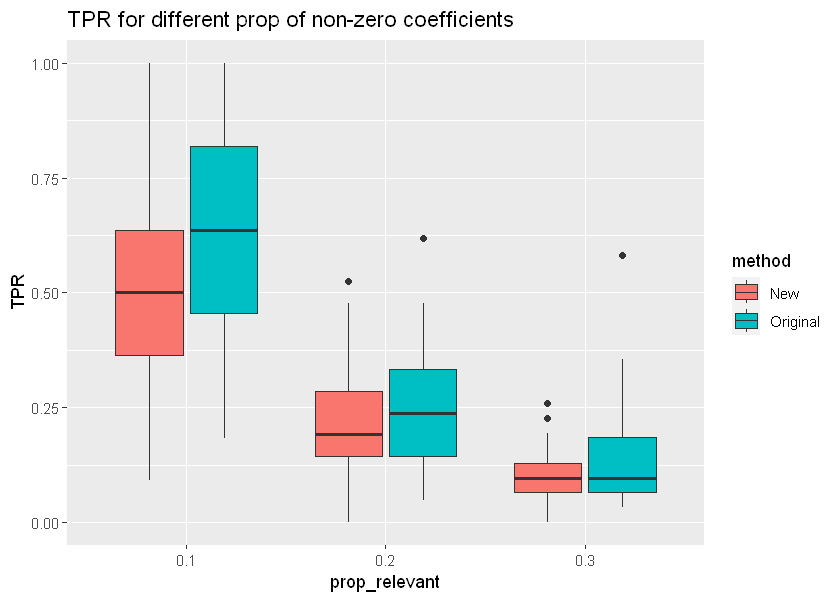

In [20]:
options(repr.plot.width=7, repr.plot.height =5) 
ggplot(df_sep, aes(x=prop_relevant, y=TPR, fill=method)) + 
    geom_boxplot() + ggtitle('TPR for different prop of non-zero coefficients')

Warning message:
"Removed 2 rows containing non-finite values (`stat_boxplot()`)."


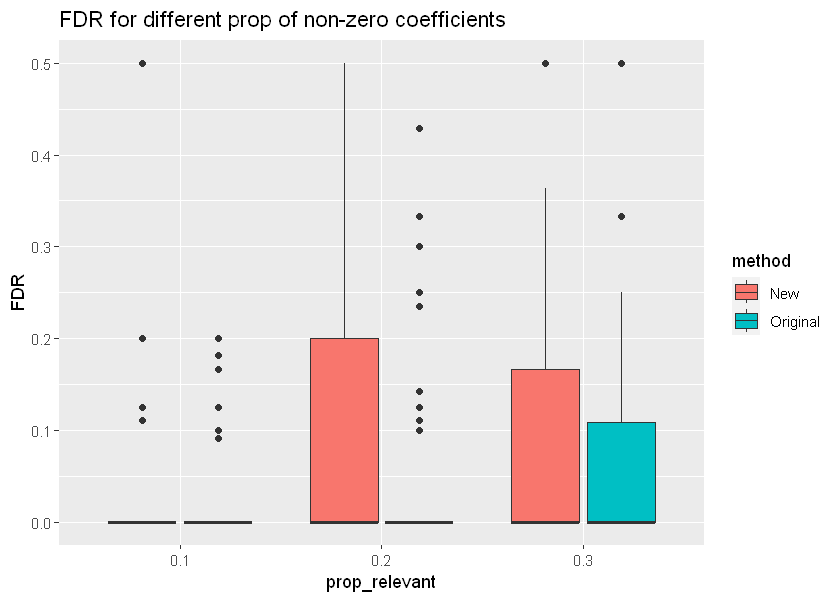

In [21]:
ggplot(df_sep, aes(x=prop_relevant, y=FDR, fill=method)) + 
    geom_boxplot() + ggtitle('FDR for different prop of non-zero coefficients')

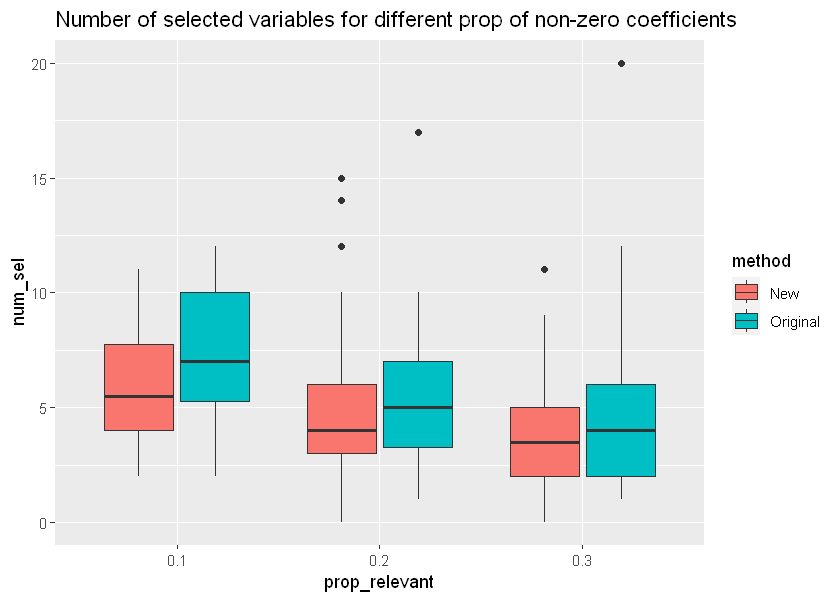

In [22]:
ggplot(df_sep, aes(x=prop_relevant, y=num_sel, fill=method)) + 
    geom_boxplot() + ggtitle('Number of selected variables for different prop of non-zero coefficients')

## Takeaways

* SNR seems to not really influence the results in this simulation.
* The SelInf method seems to select less variables as the number of non-zero coefficients rises.
* Using Naive GLMMLasso fails to control the FDR, but in this setting SelInf is way too conservative, with median FDR at 0, but very low TPR.
* FDR with SelInf also presents a lot of outliers, with values up to 1 in some cases.

In [23]:
mean(df1[!is.na(df1[,'FDR_selinf']),'FDR_selinf'])
mean(df1[!is.na(df1[,'TPR_selinf']),'TPR_selinf'])

[1] 0.05326271

[1] 0.3434064

In [24]:
mean(df2[!is.na(df2[,'FDR_selinf']),'FDR_selinf'])
mean(df2[!is.na(df2[,'TPR_selinf']),'TPR_selinf'])

[1] 0.07462292

[1] 0.2743425